# **Data Visualization**

## Data Preprocessing

In [1]:
##Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random
from urllib import request
import nltk
import requests
from bs4 import BeautifulSoup
import re
from urllib import request
import nltk
import pandas as pd
import random
nltk.download('punkt')

import nltk
import random
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

##Fetching the text using the url
def text_gutenberg(url_txt):
    response = requests.get(url_txt)
    raw = response.text

    start_regex = r'\*\*\* START OF (THIS|THE) PROJECT GUTENBERG EBOOK'
    end_regex = r'\*\*\* END OF (THIS|THE) PROJECT GUTENBERG EBOOK'

    start_match = re.search(start_regex, raw)
    end_match = re.search(end_regex, raw)

    if start_match and end_match:
        beginning = start_match.end()
        end_position = end_match.start()
        text = raw[beginning:end_position]
        return text
    else:
        print(f"Start or end pattern not found in {url_txt}")
        return ""

#finding the text's title and author
def get_book_info(url_text):
    try:
        response = requests.get(url_text)
        soup = BeautifulSoup(response.text, 'html.parser')

        content = soup.get_text()
        title_match = re.search(r'Title:\s*([^\n\r]+)', content)
        author_match = re.search(r'Author:\s*([^\n\r]+)', content)

        title = title_match.group(1).strip() if title_match else "Title not found"
        author = author_match.group(1).strip() if author_match else "Author not found"

        return title, author
    except Exception as e:
        return f"Error: {e}"

## Preprocess and tokenize text
def preprocess_and_tokenize(text):
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words and token.isalpha()]
    preprocessed_text = ' '.join(cleaned_tokens)  # For the preprocessed column
    return preprocessed_text, cleaned_tokens

##Creating the samples
def create_samples(url_txt, label, n_samples=200, record_length=150):
    text = text_gutenberg(url_txt)
    title, author = get_book_info(url_txt)

    words = text.split()
    total_length = len(words)
    used_indices = set()

    samples = []
    for _ in range(n_samples):
        start_index = get_non_overlapping_start_index(used_indices, record_length, total_length)
        used_indices.update(range(start_index, start_index + record_length))

        sample_text = ' '.join(words[start_index:start_index + record_length])
        preprocessed_text, tokens = preprocess_and_tokenize(sample_text)

        samples.append({
            'Title': title,
            'Author': author,
            'Label': label,
            'Preprocessed_Text': preprocessed_text,
            'Tokens': tokens
        })

    return samples

##Creating the dataframe
def create_dataframe(book_urls):
    all_samples = []

    for label, url in enumerate(book_urls, start=0):
        book_label = chr(97 + label)  # Generate labels a, b, c, ...
        book_samples = create_samples(url, book_label)
        all_samples.extend(book_samples)

    df = pd.DataFrame(all_samples)
    return df

## Set a seed for reproducibility
random.seed(42)

#Helper function to make sure functions don't overlap
def get_non_overlapping_start_index(used_indices, record_length, total_length, max_attempts=1000):
    attempt = 0
    while attempt < max_attempts:
        start_index = random.randint(0, total_length - record_length)
        if all(start_index not in range(index, index + record_length) for index in used_indices):
            return start_index
        attempt += 1
    raise ValueError("Unable to find a non-overlapping start index. Consider reducing sample size or record length.")


#Using 6 books of the fantasy genra
book_urls = ["https://www.gutenberg.org/cache/epub/1342/pg1342-images.html",
             "https://www.gutenberg.org/cache/epub/2489/pg2489-images.html",
             "https://www.gutenberg.org/cache/epub/43/pg43-images.html",
             "https://www.gutenberg.org/cache/epub/174/pg174-images.html",
             "https://www.gutenberg.org/cache/epub/1661/pg1661-images.html",
             "https://www.gutenberg.org/cache/epub/36/pg36-images.html"]
df = create_dataframe(book_urls)



df

import pandas as pd

# Assuming `df` is your DataFrame created from `create_dataframe` function
# Example dictionary, replace 'Author A', 'Author B', etc., with actual author names and their genres
author_to_genre = {
    'Jane Austen': 'Classic Romance',
    'Herman Melville': 'Adventure/Sea Story',
    'Robert Louis Stevenson': 'Psychological Thriller/Mystery',
    'Oscar Wilde': 'Philosophical Fiction',
    'Arthur Conan Doyle': 'Mystery/Detective Fiction',
    'H. G. Wells': 'Science Fiction'

    # Add more mappings as needed
}

# Function to map each author to a genre
def map_genre(author):
    return author_to_genre.get(author, 'Unknown')  # Default genre if author not found

# Apply the function to create a new 'Genre' column based on 'Author' column
df['Genre'] = df['Author'].apply(map_genre)

df



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,Author,Label,Preprocessed_Text,Tokens,Genre
0,Pride and Prejudice,Jane Austen,a,say p peopl much said lucki p ye sir know go w...,"[say, p, peopl, much, said, lucki, p, ye, sir,...",Classic Romance
1,Pride and Prejudice,Jane Austen,a,div figcent width figur img imag unavail div c...,"[div, figcent, width, figur, img, imag, unavai...",Classic Romance
2,Pride and Prejudice,Jane Austen,a,result previou studi thing give miss austen re...,"[result, previou, studi, thing, give, miss, au...",Classic Romance
3,Pride and Prejudice,Jane Austen,a,tongu servant wait tabl judg better one househ...,"[tongu, servant, wait, tabl, judg, better, one...",Classic Romance
4,Pride and Prejudice,Jane Austen,a,near relat patro happen overhear gentleman men...,"[near, relat, patro, happen, overhear, gentlem...",Classic Romance
...,...,...,...,...,...,...
1195,The War of the Worlds,H. G. Wells,f,lot glass overturn water trough movement langu...,"[lot, glass, overturn, water, trough, movement...",Science Fiction
1196,The War of the Worlds,H. G. Wells,f,see look detail clear peopl hous better go alo...,"[see, look, detail, clear, peopl, hous, better...",Science Fiction
1197,The War of the Worlds,H. G. Wells,f,strike breviti p martian alarm approach crowd ...,"[strike, breviti, p, martian, alarm, approach,...",Science Fiction
1198,The War of the Worlds,H. G. Wells,f,brute said good god ugli brute repeat p see ma...,"[brute, said, good, god, ugli, brute, repeat, ...",Science Fiction


# Word count

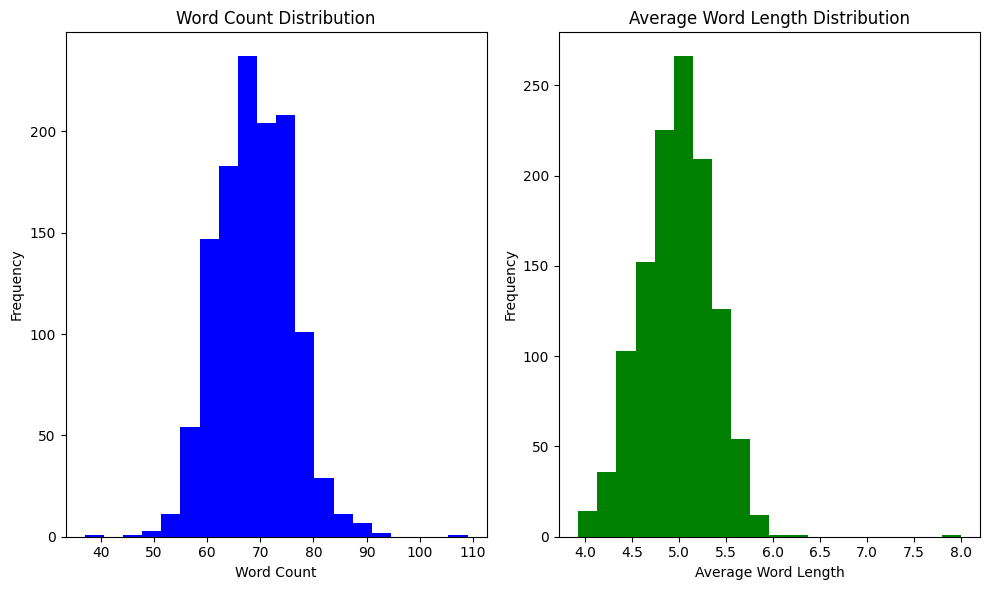

In [2]:
import matplotlib.pyplot as plt


# Calculating word count and average word length
df['word_count'] = df['Tokens'].apply(lambda x: len(x))
df['char_count'] = df['Tokens'].apply(lambda x: sum(len(word) for word in x))
df['avg_word_length'] = df['char_count'] / df['word_count']

# Displaying first few rows
df[['Tokens', 'word_count', 'avg_word_length']].head()

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['word_count'], bins=20, color='blue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['avg_word_length'], bins=20, color='green')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Word count by author and Average word length by author



<ipython-input-3-ef7cc911bbd5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='Word_Count', data=author_word_counts_sorted, palette='viridis')  # 'viridis' is just one of the color palettes


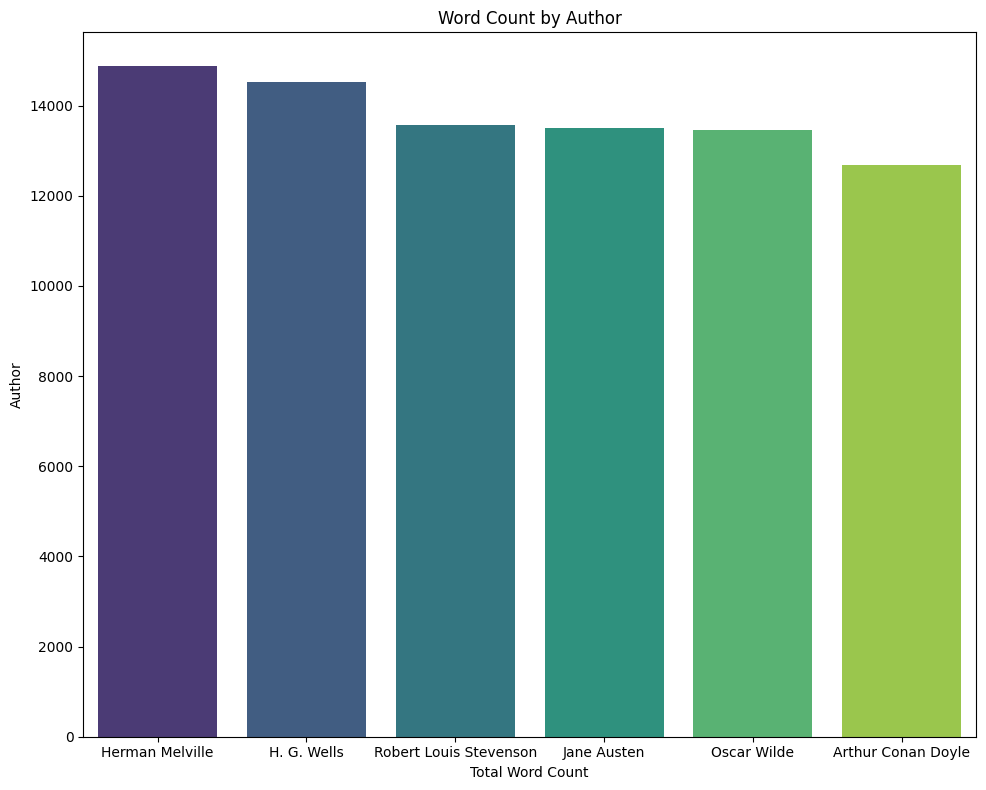

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it includes 'Author' and 'Tokens' columns

# Calculate word counts by author
df['Word_Count'] = df['Tokens'].apply(len)  # Create a new column with the word count of each row
author_word_counts = df.groupby('Author')['Word_Count'].sum().reset_index()  # Sum word counts by author

# Sort authors by word count for better visualization
author_word_counts_sorted = author_word_counts.sort_values('Word_Count', ascending=False)

# Generate the bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.barplot(x='Author', y='Word_Count', data=author_word_counts_sorted, palette='viridis')  # 'viridis' is just one of the color palettes

plt.xlabel('Total Word Count')  # Set the x-axis label
plt.ylabel('Author')  # Set the y-axis label
plt.title('Word Count by Author')  # Set the title of the plot
plt.tight_layout()  # Adjust the layout to make room for the labels

plt.show()

<ipython-input-4-9bf8f5d10dda>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='Avg_Word_Length', data=author_avg_word_lengths_sorted, palette='viridis')  # 'viridis' is just one of the color palettes


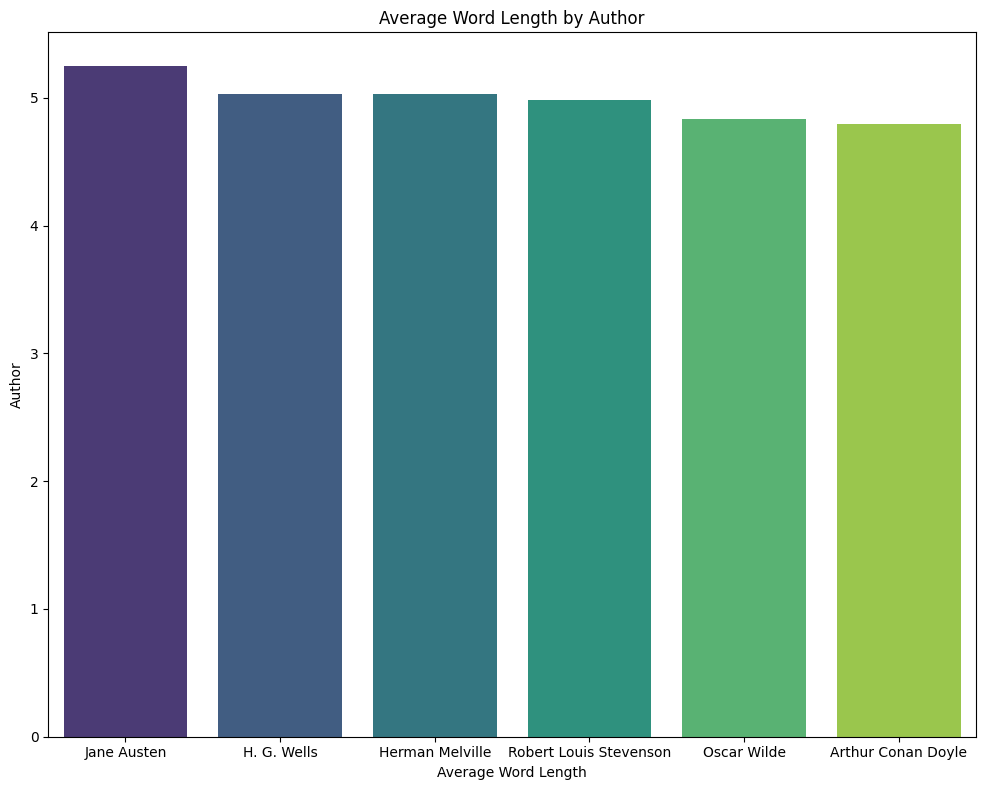

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it includes 'Author' and 'Tokens' columns

# Calculate average word length for each document
df['Avg_Word_Length'] = df['Tokens'].apply(lambda tokens: sum(len(token) for token in tokens) / len(tokens) if tokens else 0)

# Aggregate these averages by author
author_avg_word_lengths = df.groupby('Author')['Avg_Word_Length'].mean().reset_index()  # Calculate mean of averages for each author

# Sort authors by average word length for better visualization
author_avg_word_lengths_sorted = author_avg_word_lengths.sort_values('Avg_Word_Length', ascending=False)

# Generate the bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.barplot(x='Author', y='Avg_Word_Length', data=author_avg_word_lengths_sorted, palette='viridis')  # 'viridis' is just one of the color palettes

plt.xlabel('Average Word Length')  # Set the x-axis label
plt.ylabel('Author')  # Set the y-axis label
plt.title('Average Word Length by Author')  # Set the title of the plot
plt.tight_layout()  # Adjust the layout to make room for the labels

plt.show()


# Sentiment and subjectivity score

<ipython-input-5-55dd49ab12df>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='sentiment', data=df, palette='viridis')


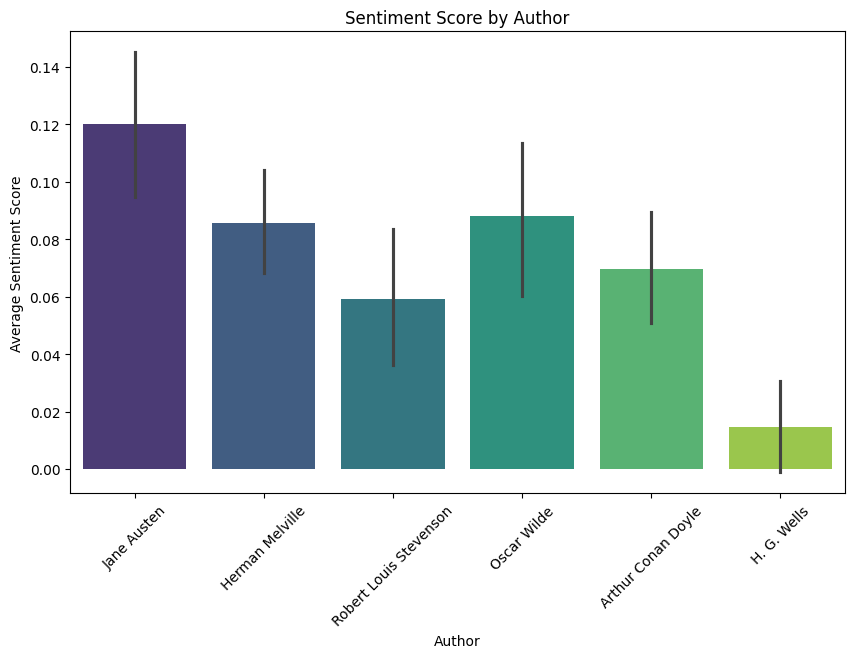

In [5]:
from textblob import TextBlob

# Calculating sentiment score
df["sentiment"] = df['Tokens'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
df[['Tokens', 'sentiment']].head()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Author', y='sentiment', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sentiment Score by Author')
plt.xlabel('Author')
plt.ylabel('Average Sentiment Score')
plt.show()

<ipython-input-6-f42ac289176a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Author', y='subjectivity_score', data=df, palette='pastel')


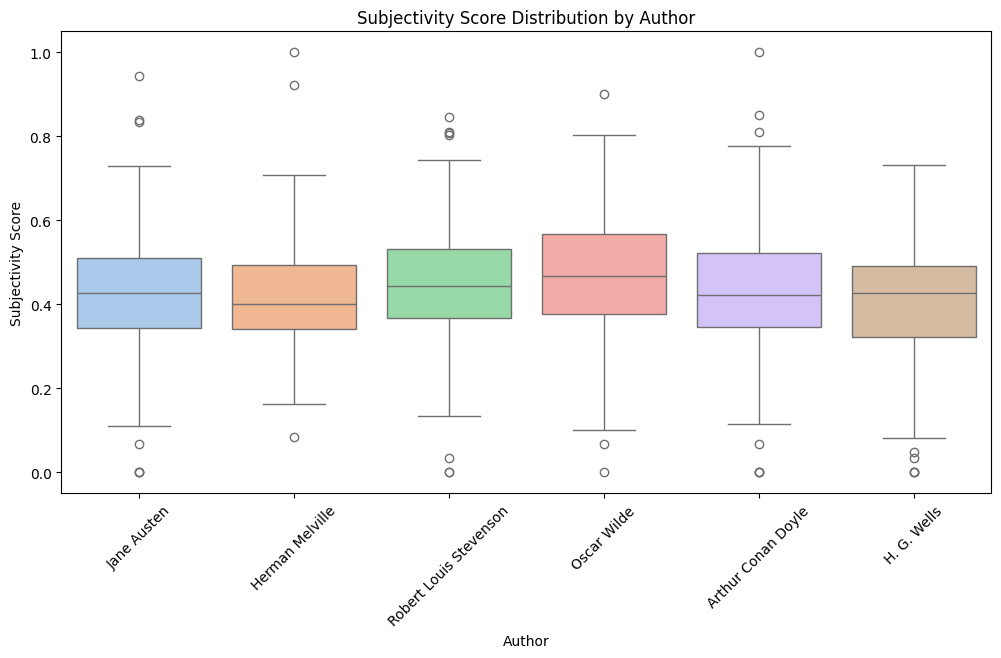

In [6]:
# Calculating subjectivity score
df["subjectivity_score"] = df['Tokens'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
df[['Tokens', 'subjectivity_score']].head()
# Box Plot Visualization of Subjectivity Score by Author
plt.figure(figsize=(12, 6))
sns.boxplot(x='Author', y='subjectivity_score', data=df, palette='pastel')
plt.xticks(rotation=45)
plt.title('Subjectivity Score Distribution by Author')
plt.xlabel('Author')
plt.ylabel('Subjectivity Score')
plt.show()